In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist



In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

(60000, 28, 28)


In [5]:
print(x_train.shape,y_train.shape)

(60000, 28, 28, 1) (60000, 10)


In [6]:
print(x_test.shape,y_test.shape)

(10000, 28, 28, 1) (10000, 10)


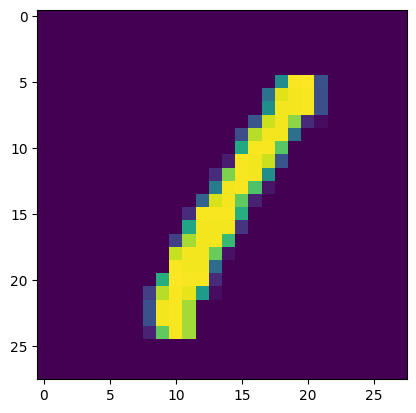

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [17]:
import matplotlib.pyplot as plt
index = 3
plt.imshow(x_train[index]) #display sample training image
plt.show()
print(y_train[index])

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
def build_ann_model():
  model = Sequential()
  model.add(Flatten(input_shape=(28, 28, 1)))
  model.add(Dense(128, activation="relu"))
  model.add(Dense(64, activation="relu"))
  model.add(Dense(10, activation="softmax"))
  return model

In [8]:
ann_model = build_ann_model()
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
ann_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2298 - accuracy: 0.9326 - val_loss: 0.1144 - val_accuracy: 0.9656
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0994 - accuracy: 0.9694 - val_loss: 0.1025 - val_accuracy: 0.9679
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0691 - accuracy: 0.9787 - val_loss: 0.0807 - val_accuracy: 0.9734
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0531 - accuracy: 0.9836 - val_loss: 0.0728 - val_accuracy: 0.9770
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0416 - accuracy: 0.9867 - val_loss: 0.0908 - val_accuracy: 0.9730
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0347 - accuracy: 0.9883 - val_loss: 0.0883 - val_accuracy: 0.9757
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0269 - accuracy: 0.9909 - val_loss: 0.0899 - val_accuracy:

In [11]:
ann_loss, ann_acc = ann_model.evaluate(x_test, y_test)
print('ANN Test Accuracy:', ann_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0968 - accuracy: 0.9757
ANN Test Accuracy: 0.9757000207901001


In [18]:
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
def build_cnn_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation="relu"))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(64, activation="relu"))
  model.add(Dense(10, activation="softmax"))
  return model

In [19]:
cnn_model = build_cnn_model()
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [20]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [21]:
cnn_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 56s 29ms/step - loss: 0.1423 - accuracy: 0.9558 - val_loss: 0.0527 - val_accuracy: 0.9821
Epoch 2/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0478 - accuracy: 0.9853 - val_loss: 0.0431 - val_accuracy: 0.9856
Epoch 3/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0331 - accuracy: 0.9894 - val_loss: 0.0310 - val_accuracy: 0.9896
Epoch 4/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0248 - accuracy: 0.9922 - val_loss: 0.0299 - val_accuracy: 0.9900
Epoch 5/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0193 - accuracy: 0.9936 - val_loss: 0.0262 - val_accuracy: 0.9923
Epoch 6/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0152 - accuracy: 0.9950 - val_loss: 0.0318 - val_accuracy: 0.9899
Epoch 7/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0118 - accuracy: 0.9959 - val_loss: 0.0262 -

In [22]:
cnn_loss, cnn_acc = cnn_model.evaluate(x_test, y_test)
print('CNN Test Accuracy:', cnn_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.0265 - accuracy: 0.9925
CNN Test Accuracy: 0.9925000071525574
